### Decomposição em Valores Singulares aplicada em Processamento de Sinais
Daniel Arruda, Manoel Silva, Pedro Jorge

In [145]:
import numpy as np 
from numpy.linalg import *
import matplotlib.pyplot as plt

from typing import *

### Funções auxiliares e definições

Funções auxiliares para geração dos sinais

In [146]:
def noise(level: float, mean: float, std: float) -> float:
    """
    Gera um valor ruidoso a partir da amostragem de uma distribuição normal e um nível de ruído.

    Args:
        level (float): nível do ruído. 0.01 é um nível "baixo", 0.1 é um nível "alto"
        mean (float): média da distribuição normal
        std (float): desvio padrão da distribuição normal. Quanto maior, mais o ruído é espalhado

    Returns:
        float: um valor aleatório de ruído
    """
    return np.random.normal(mean, std) * level


def generate_signal_vector(f: Callable, sample_points: np.ndarray, noise_level: float, noise_mean: float = 0, noise_std: float = 1) -> np.ndarray:
    """
    Gera amostras ruidosas de uma função f para cada ponto em sample_points.

    Args:
        f (Callable): função alvo da amostragem
        sample_points (np.ndarray): conjunto de pontos do domínio da função f
        noise_level (float): nível do ruído. 0.01 é um ruído "baixo", 0.1 é um ruído "alto"
        noise_mean (float, optional): média da distribuição normal. Defaults to 0.
        noise_std (float, optional): desvio padrão da distribuição normal. Quanto maior, mais o ruído é espalhado. Defaults to 1.

    Returns:
        np.ndarray: vetor de valores ruidosos para a função f em cada ponto de sample_points
    """
    v = np.zeros_like(sample_points)
    for idx, x in enumerate(sample_points):
        v[idx] = f(x) + noise(noise_level, noise_mean, noise_std)
    
    return v
        


def generate_signal_matrix(f: Callable, sample_points: np.ndarray, noise_level: float, n_signals: int, noise_mean: float = 0, noise_std: float = 1) -> np.ndarray:
    """
    Gera uma matriz de amostras ruidosas de uma função f para cada ponto em sample_points. Cada vetor é um sinal ruidoso.

    Args:
        f (Callable): função alvo da amostragem
        sample_points (np.ndarray): conjunto de pontos do domínio da função f
        noise_level (float): nível do ruído. 0.01 é um ruído "baixo", 0.1 é um ruído "alto"
        n_signals (int): número de sinais (vetores) a serem gerados
        noise_mean (float, optional): média da distribuição normal. Defaults to 0.
        noise_std (float, optional): esvio padrão da distribuição normal. Quanto maior, mais o ruído é espalhado. Defaults to 1.

    Returns:
        np.ndarray: matriz de sinais ruidosos. Cada vetor é um sinal ruidoso para a função f no intervalo de sample_points.
    """
    n_points = sample_points.size
     
    m = np.zeros((n_points, n_signals))
    for i in range(n_signals):
        m[:, i] = generate_signal_vector(f, sample_points, noise_level, noise_mean, noise_std)
    
    return m


def generate_sample_points(min: float, max: float, step: float) -> np.ndarray:
    """
    Gera uma lista de pontos x.

    Args:
        min (float): limite inferior da lista.
        max (float): limite superior da lista.
        step (float): tamanho do intervalo entre dois pontos.

    Returns:
        np.ndarray: lista de pontos
    """
    return np.arange(min, max, step)

Funções auxiliares para plot

In [147]:
def plot_signal(sample_points: np.ndarray, signal_matrix: np.ndarray, label: str = "Sinais com ruído") -> None:
    """
    Plota um conjunto de sinais.

    Args:
        sample_points (np.ndarray): lista de pontos do domínio
        signal_matrix (np.ndarray): matriz de sinais com amostragens para os valores do sinal em cada ponto
        label (str, optional): Título do plot. Defaults to "Sinais com ruído".
    """
    plt.plot(sample_points, signal_matrix)
    plt.title(label)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    

def plot_singular_values(S: np.ndarray, label="Valores Singulares", cumsum: bool = False) -> None:
    """
    Plota os valores singulares.

    Args:
        S (np.ndarray): lista dos valores singulares
        label (str, optional): Título do plot. Defaults to "Valores Singulares".
    """ 
    idx_S = [idx for idx in range(1, len(S)+1)]
    
    if cumsum:
        plt.scatter(idx_S, np.cumsum(S)/np.sum(S), color='blue')
        plt.xlabel("Índice do valor singular")
        
    else:  
        plt.scatter(idx_S, S, color='blue', label=label)
        plt.title(label)
        plt.xlabel("Índice do valor singular")
        plt.ylabel('Valor singular')
        
        plt.legend()
    plt.show()

In [148]:
def svd_reconstruction(U: np.ndarray, S: np.ndarray, V: np.ndarray, n_components: int) -> np.ndarray:
    """
    Reconstrói uma matriz até certo posto.

    Args:
        U (np.ndarray): matriz U do SVD
        S (np.ndarray): matriz S do SVD
        V (np.ndarray): matriz V do SVD
        n_components (int): posto da matriz reconstruída

    Returns:
        np.ndarray: matriz original reconstruída com posto igual a n_components
    """
    U = U[:, :n_components]
    S = np.diag(S[:n_components])
    V = V[:n_components, :]
    
    return U @ S @ V

Definição dos valores que usaremos para gerar os sinais

In [149]:
x_min = 0
x_max = 10
step = 0.1

sample_points = generate_sample_points(x_min, x_max, step)
n_signals = 10 #len(sample_points)

noise_level = 0.05
noise_mean = 0
noise_std = 1

### Testes em $\sin(x)$

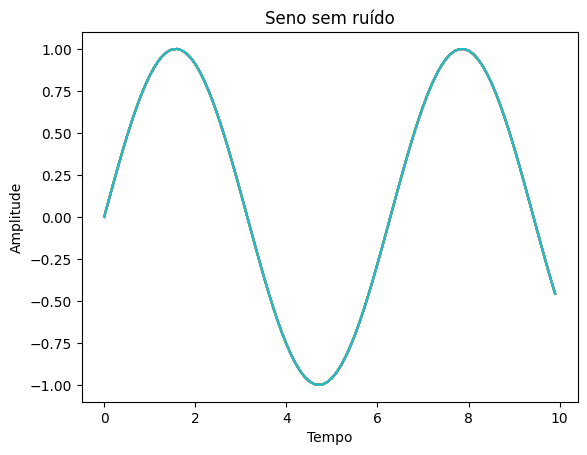

In [150]:
# gerando amostras de seno sem ruido
sin = generate_signal_matrix(np.sin, sample_points, 0, n_signals, noise_mean=0, noise_std=0)
plot_signal(sample_points, sin, label="Seno sem ruído")

#### Sinais senoidais com ruído

In [151]:
# gerando amostras de senos ruidosos
sin_signal = generate_signal_matrix(np.sin, sample_points, noise_level, n_signals, noise_mean, noise_std)
# aplicando o svd
U, S, V = svd(sin_signal)

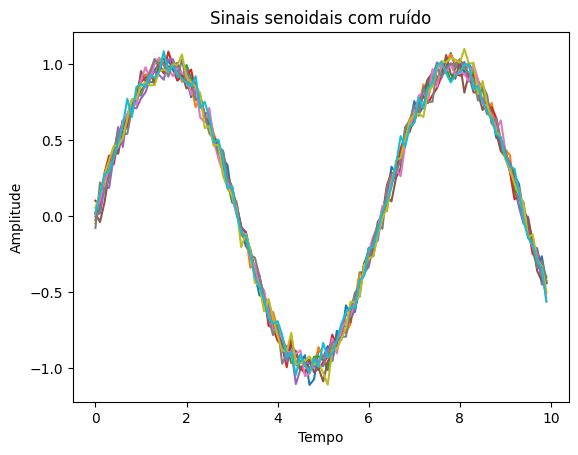

In [152]:
plot_signal(sample_points, sin_signal, "Sinais senoidais com ruído")

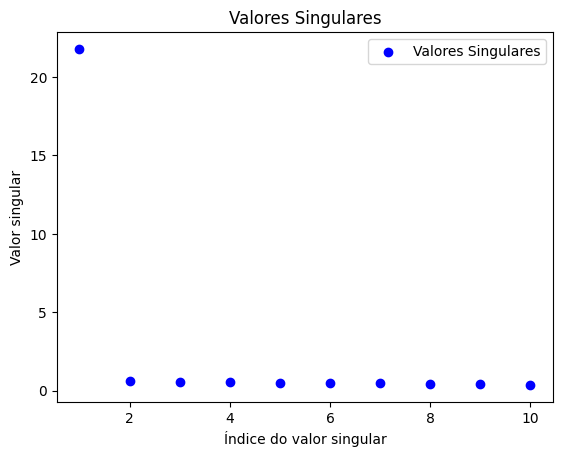

In [153]:
plot_singular_values(S)


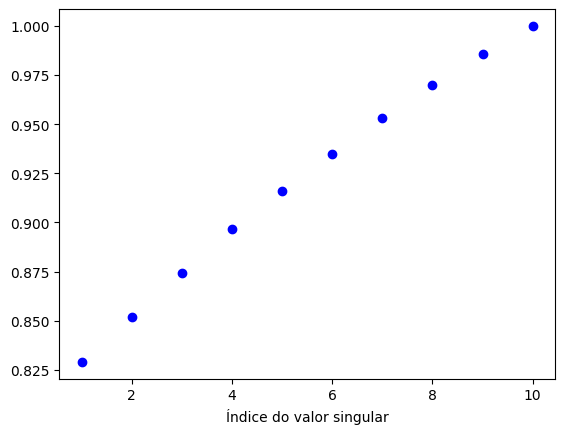

In [154]:
plot_singular_values(S, cumsum=True)

#### Reconstrução com SVD usando posto 1

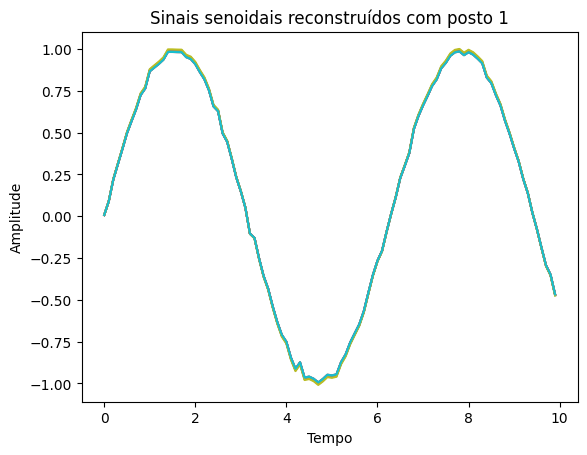

In [155]:
# reconstruindo os sinais de seno ruidosos com posto 1
reconstructed_sin_signal = svd_reconstruction(U, S, V, 1)
plot_signal(sample_points, reconstructed_sin_signal, "Sinais senoidais reconstruídos com posto 1")

#### Primeiro componente do SVD 

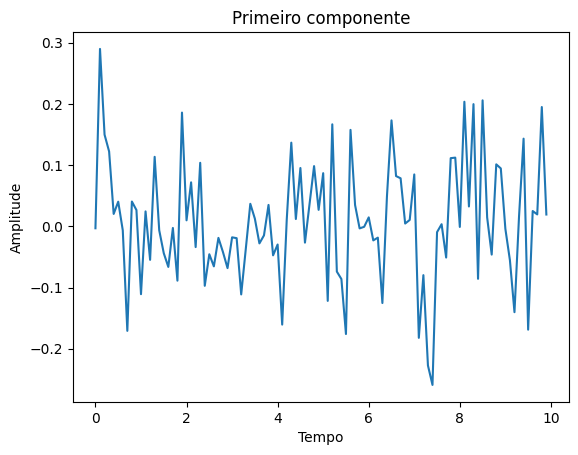

In [156]:
plot_signal(sample_points, U[:, 1], label="Primeiro componente")

#### Diferença entre sinal original com ruído e reconstrução

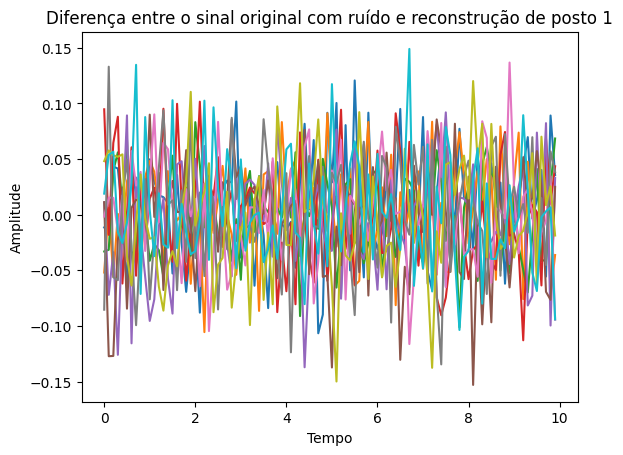

In [157]:
# calculando a diferença entre o sinal ruidoso original e o sinal reconstruído
difference = sin_signal - reconstructed_sin_signal
plot_signal(sample_points, difference, label="Diferença entre o sinal original com ruído e reconstrução de posto 1")

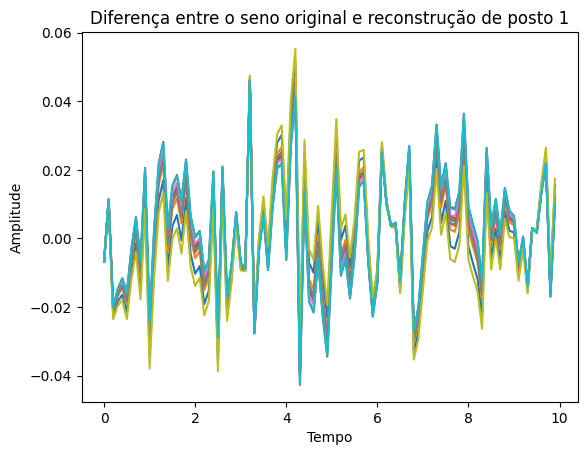

In [158]:
difference = sin - reconstructed_sin_signal
plot_signal(sample_points, difference, label="Diferença entre o seno original e reconstrução de posto 1")

In [159]:
# calculando a norma da diferença entre o sinal ruidoso original e a reconstrução de posto 1
error = norm(sin_signal - reconstructed_sin_signal)
# calculando a norma da diferença entre a primeira componente da matriz U e uma amostra do sinal ruidoso original
error_1_component = norm(U[:, 1] - sin_signal[:, 1])

print(f"Erro entre o sinal original com ruído e a reconstrução de posto 1: {error}")
print(f"Erro entre o sinal original e o primeiro componente da matriz U: {error_1_component}")

Erro entre o sinal original com ruído e a reconstrução de posto 1: 1.5148486608001925
Erro entre o sinal original e o primeiro componente da matriz U: 6.990206624673499


### Testes em sinais combinados
Combinando as funções $\sin(x)+cos(3x), sin(x), cos(\frac{x}{2})$

In [160]:
# guardando as funções que usaremos de forma combinada
functions = (np.sin, lambda x: np.sin(x) + np.cos(3*x), lambda x: np.cos(x/2))
signals = []
signals_raw = []

# para cada uma das funções, cria sinais ruidosos e sem ruído
for f in functions:
    # ruidosos
    signals.append(generate_signal_matrix(f, sample_points, noise_level, n_signals, noise_mean, noise_std))
    # sem ruídos
    signals_raw.append(generate_signal_matrix(f, sample_points, 0, n_signals, noise_mean=0, noise_std=0))

# junta todos os sinais ruidosos das funções
signals = np.hstack(signals)
# junta todos os sinais sem ruído
signals_raw = np.hstack(signals_raw)
# calcula o SVD da matriz resultante
U, S, V = svd(signals)

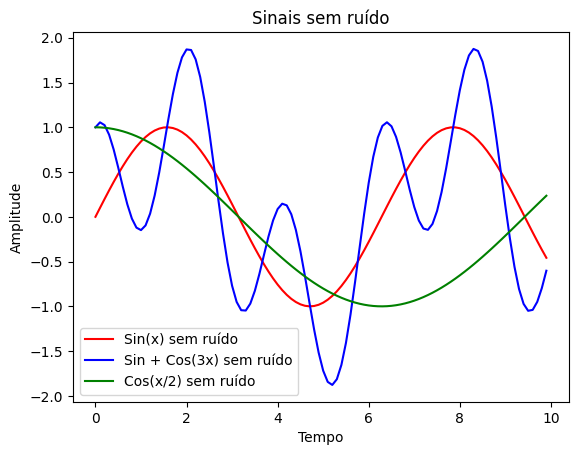

In [161]:
# plot_signal(sample_points, signals_raw, label="Sinais sem ruído")

# plotando os sinais ruidosos sem ruído

plt.plot(sample_points, signals_raw[:,0], color='red', label="Sin(x) sem ruído")
plt.plot(sample_points, signals_raw[:,10], color='blue', label="Sin + Cos(3x) sem ruído")
plt.plot(sample_points, signals_raw[:,20], color='green', label="Cos(x/2) sem ruído")

plt.title("Sinais sem ruído")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

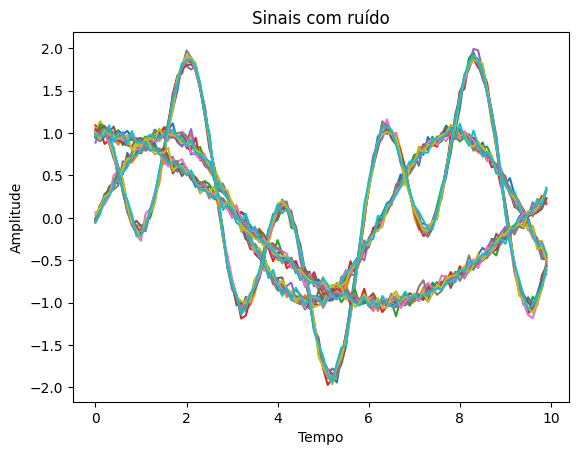

In [162]:
plot_signal(sample_points, signals)

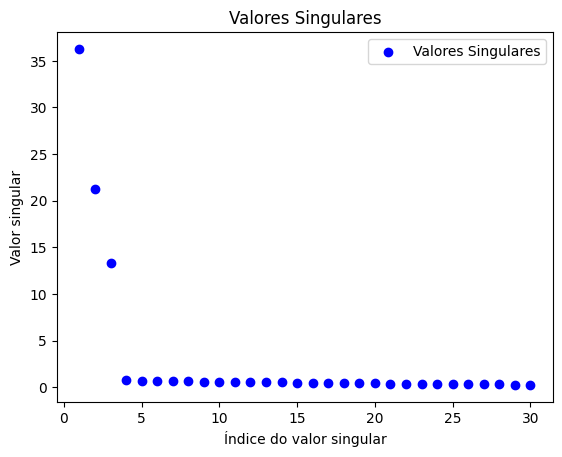

In [163]:
plot_singular_values(S)

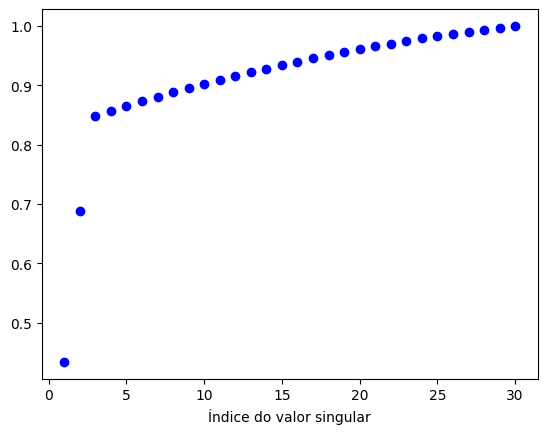

In [164]:
plot_singular_values(S, cumsum=True)

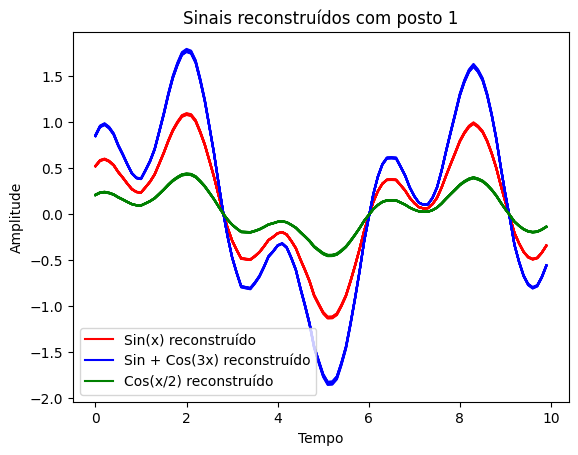

In [165]:
reconstructed_signals = svd_reconstruction(U, S, V, 1)
# plot_signal(sample_points, reconstructed_signals, "Sinais reconstruídos com posto 1")


plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Sin(x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,1:10], color='red')

plt.plot(sample_points, reconstructed_signals[:,10], color='blue', label="Sin + Cos(3x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,11:20], color='blue')
    
plt.plot(sample_points, reconstructed_signals[:,20], color='green', label="Cos(x/2) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,21:30], color='green')



plt.title("Sinais reconstruídos com posto 1")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

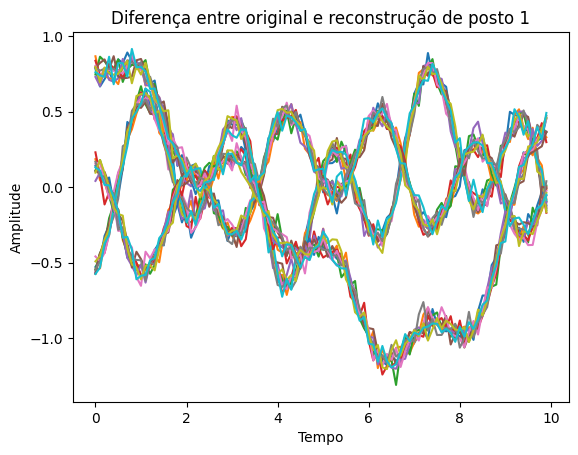

In [166]:
plot_signal(sample_points, signals - reconstructed_signals, "Diferença entre original e reconstrução de posto 1")

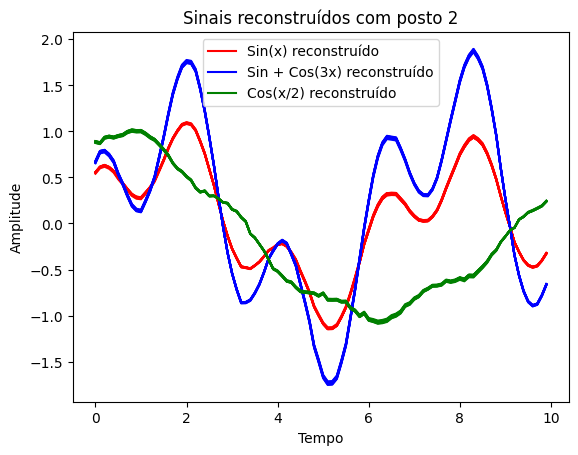

In [167]:
reconstructed_signals = svd_reconstruction(U, S, V, 2)
# plot_signal(sample_points, reconstructed_signals, "Sinais reconstruídos com posto 2")

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Sin(x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,1:10], color='red')

plt.plot(sample_points, reconstructed_signals[:,10], color='blue', label="Sin + Cos(3x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,11:20], color='blue')
    
plt.plot(sample_points, reconstructed_signals[:,20], color='green', label="Cos(x/2) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,21:30], color='green')

plt.title("Sinais reconstruídos com posto 2")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

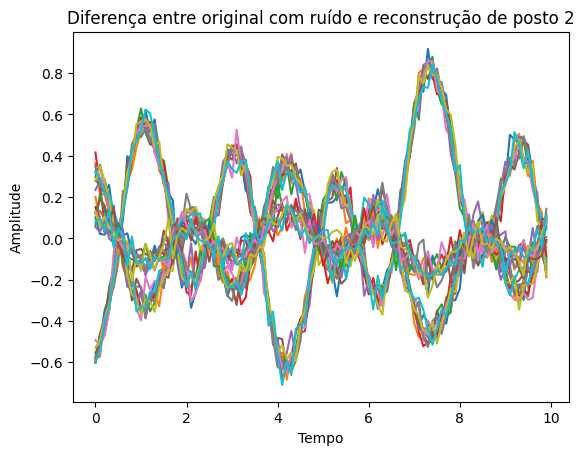

In [168]:
plot_signal(sample_points, signals - reconstructed_signals, "Diferença entre original com ruído e reconstrução de posto 2")

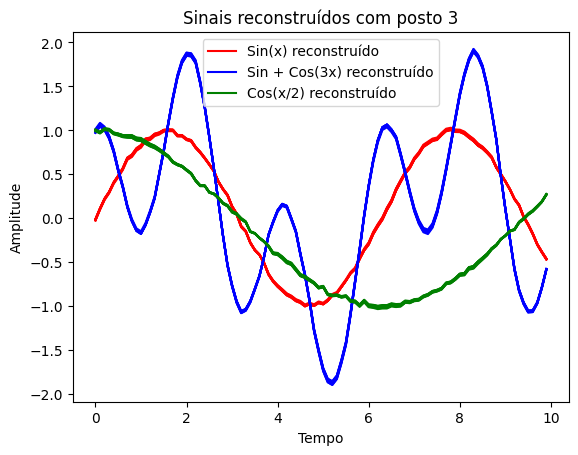

In [169]:
reconstructed_signals = svd_reconstruction(U, S, V, 3)
# plot_signal(sample_points, reconstructed_signals, "Sinais reconstruídos com posto 3")

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Sin(x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,1:10], color='red')

plt.plot(sample_points, reconstructed_signals[:,10], color='blue', label="Sin + Cos(3x) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,11:20], color='blue')
    
plt.plot(sample_points, reconstructed_signals[:,20], color='green', label="Cos(x/2) reconstruído")
plt.plot(sample_points, reconstructed_signals[:,21:30], color='green')

plt.title("Sinais reconstruídos com posto 3")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


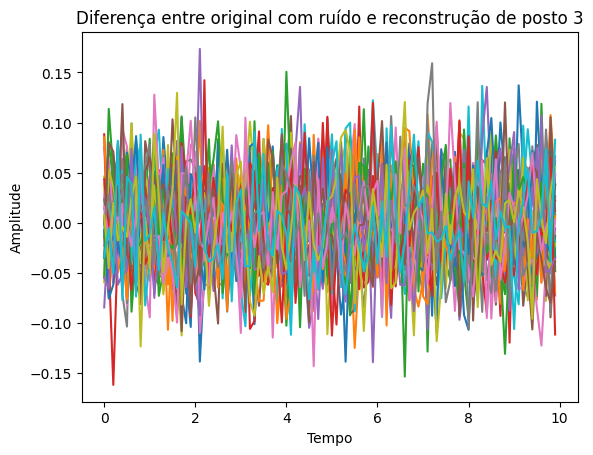

In [170]:
plot_signal(sample_points, signals - reconstructed_signals, "Diferença entre original com ruído e reconstrução de posto 3")

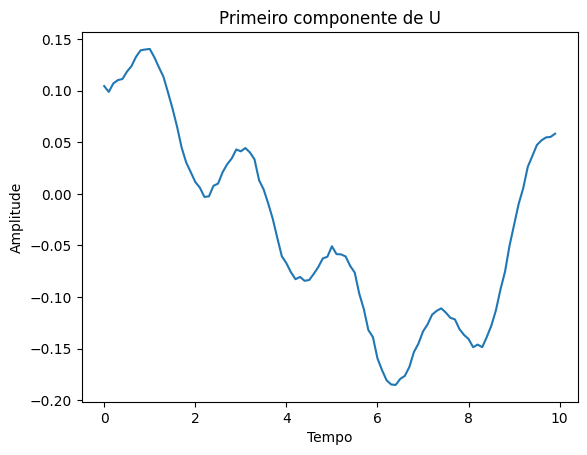

In [171]:
plot_signal(sample_points, U[:, 1], "Primeiro componente de U")

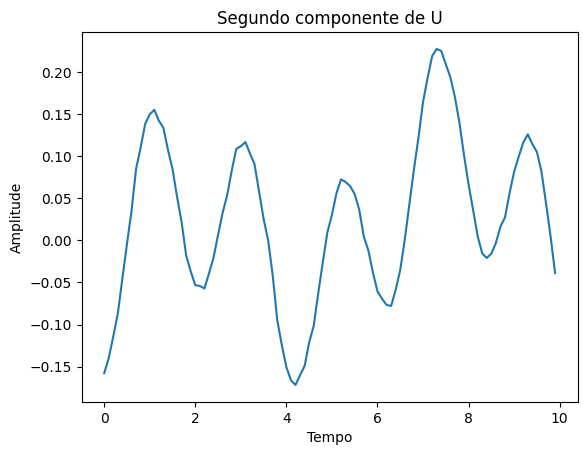

In [172]:
plot_signal(sample_points, U[:, 2], "Segundo componente de U")

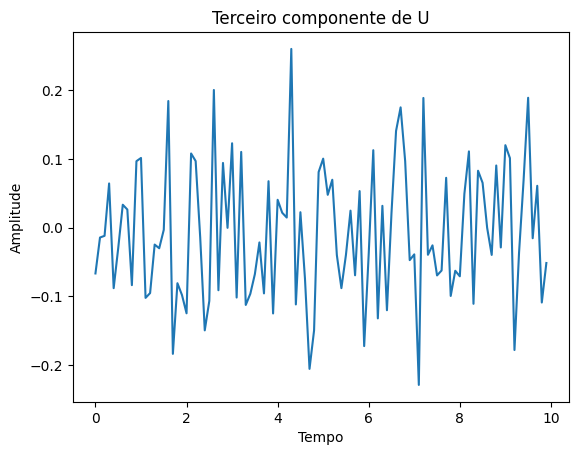

In [173]:
plot_signal(sample_points, U[:, 3], "Terceiro componente de U")

### Teste em vários sinais diferentes sem ruído
Combinando as funções com sinal quadrado, sinal triangular e senoide

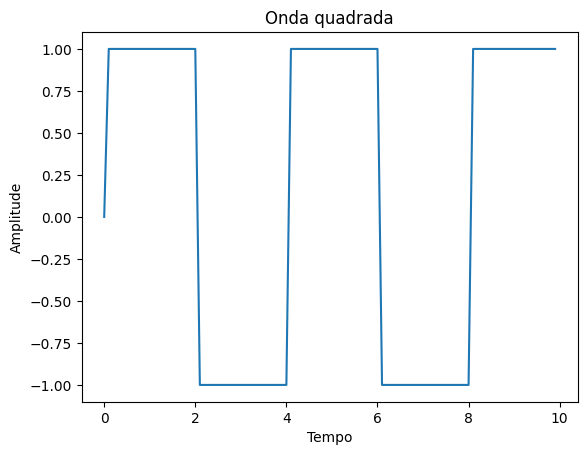

In [174]:
# Criando função de onda quadrada
func_quad = lambda x: np.sign(np.sin(1/2*np.pi*x))
sample_points = generate_sample_points(0, 10, 0.1)

# Plotando a função de onda quadrada
plt.plot(sample_points, func_quad(sample_points))
plt.title("Onda quadrada")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()

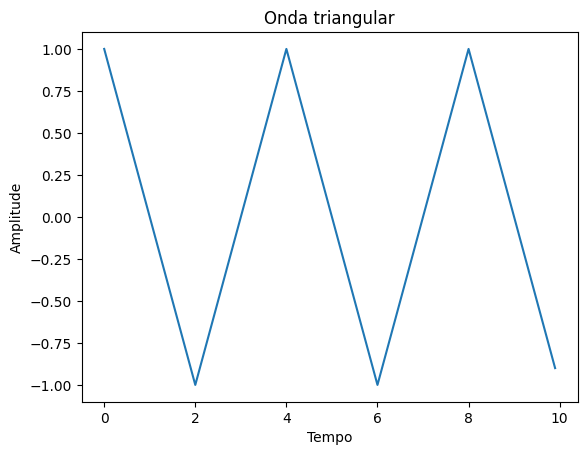

In [175]:
# Gerando funcao de onda triangular
func_tri = lambda x: np.abs(x % 4 - 2) - 1
sample_points = generate_sample_points(0, 10, 0.1)

# Plotando a função de onda triangular
plt.plot(sample_points, func_tri(sample_points))
plt.title("Onda triangular")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()


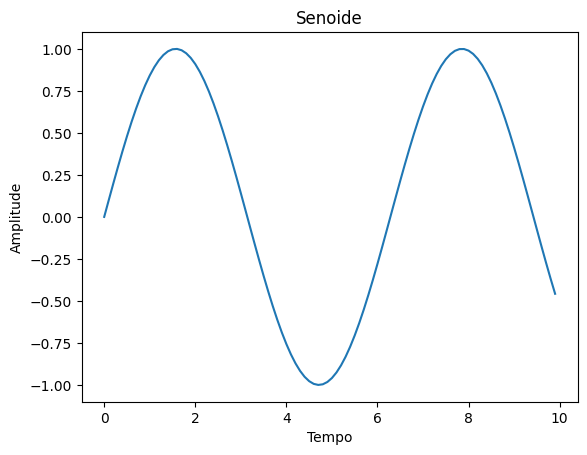

In [176]:
# Criando função senoide
func_sine = lambda x: np.sin(x)
sample_points = generate_sample_points(0, 10, 0.1)

# Plotando a função senoide
plt.plot(sample_points, func_sine(sample_points))
plt.title("Senoide")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()


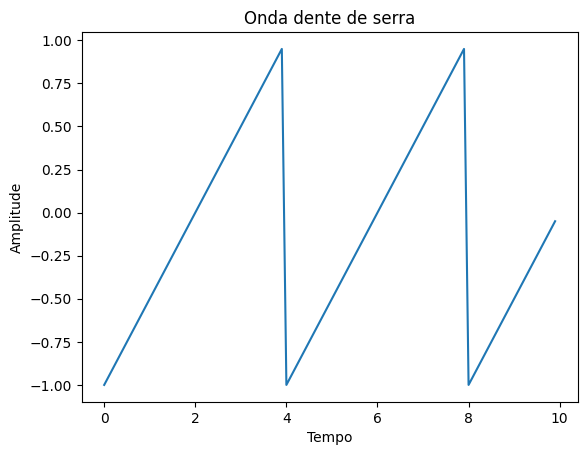

In [177]:
# Criando função de onda dente de serra
func_saw = lambda x: (x/2 % 2) - 1
sample_points = generate_sample_points(0, 10, 0.1)

# Plotando a função de onda dente de serra
plt.plot(sample_points, func_saw(sample_points))
plt.title("Onda dente de serra")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()


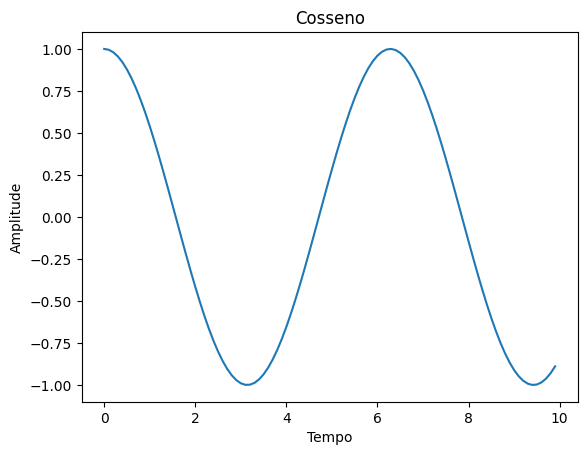

In [178]:
# Criando função cosseno (x)

func_cos = lambda x: np.cos(x)
sample_points = generate_sample_points(0, 10, 0.1)

# Plotando a função cosseno
plt.plot(sample_points, func_cos(sample_points))
plt.title("Cosseno")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.show()


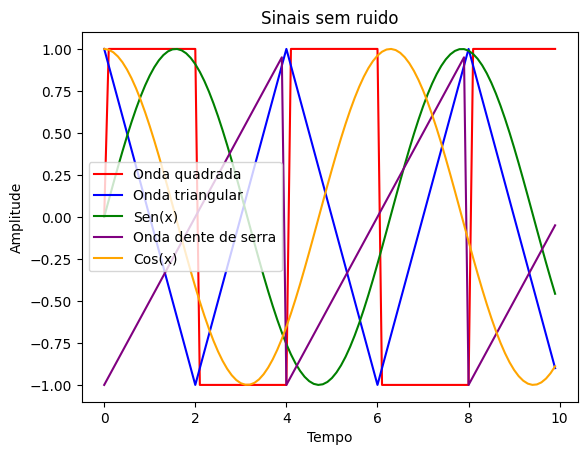

In [179]:
# Usando todas as funções juntas sem ruido
functions = (func_quad, func_tri, func_sine, func_saw, func_cos)
signals_raw = []
n_signals = 1

for f in functions:
    signals_raw.append(generate_signal_matrix(f, sample_points, 0, n_signals, noise_mean=0, noise_std=0))

signals_raw = np.hstack(signals_raw)

# Plotando sinais sem ruido
plt.plot(sample_points, signals_raw[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, signals_raw[:,1], color='blue', label="Onda triangular")
plt.plot(sample_points, signals_raw[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, signals_raw[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, signals_raw[:,4], color='orange', label="Cos(x)")


plt.title("Sinais sem ruido")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

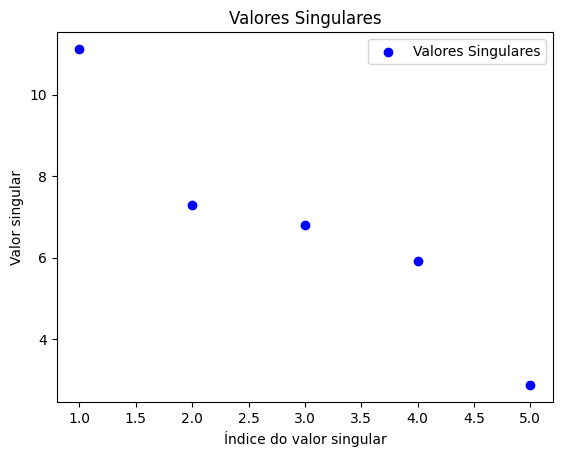

In [180]:
# Calculando SVD
U, S, V = svd(signals_raw)

# Plotando valores singulares
plot_singular_values(S)

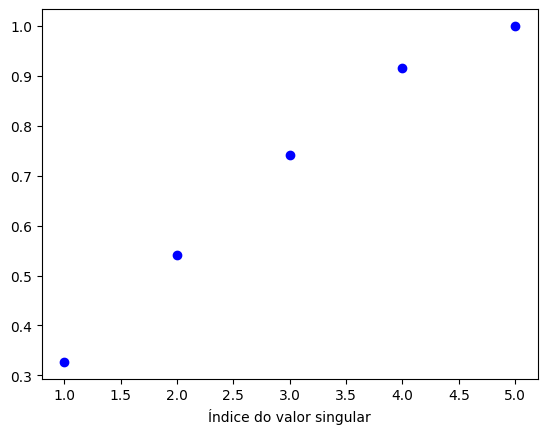

In [181]:
plot_singular_values(S, cumsum=True)

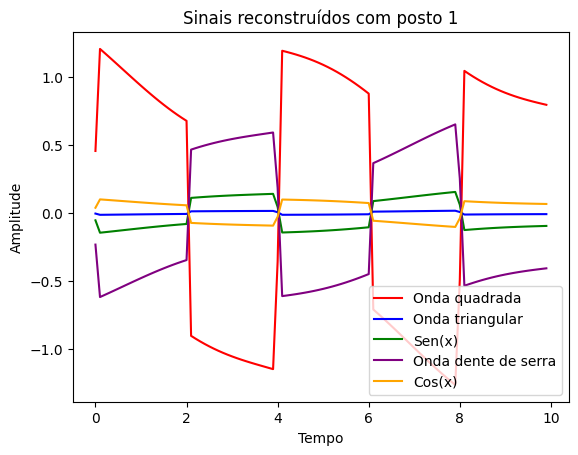

In [182]:
# Reconstruindo sinais com posto 1
reconstructed_signals = svd_reconstruction(U, S, V, 1)

# Plotando sinais reconstruidos com posto 1
plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, reconstructed_signals[:,1], color='blue', label="Onda triangular ")
plt.plot(sample_points, reconstructed_signals[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, reconstructed_signals[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, reconstructed_signals[:,4], color='orange', label="Cos(x)")

plt.title("Sinais reconstruídos com posto 1")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


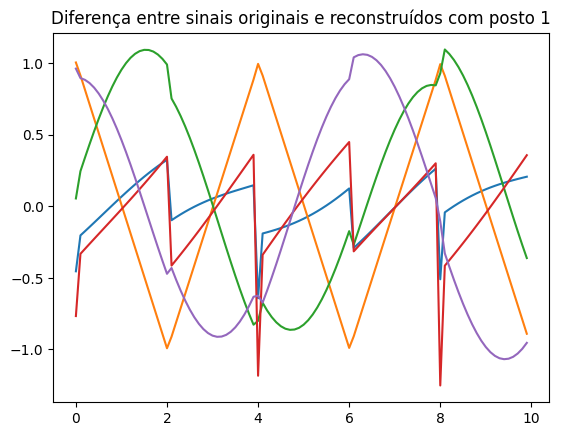

In [183]:
# Calculando erro
plt.plot(sample_points, signals_raw - reconstructed_signals)
plt.title("Diferença entre sinais originais e reconstruídos com posto 1")
plt.show()

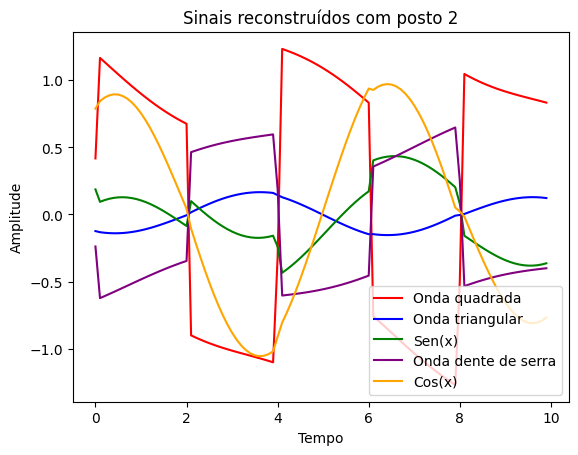

In [184]:
# Plotando sinais reconstruidos com posto 2
reconstructed_signals = svd_reconstruction(U, S, V, 2)

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, reconstructed_signals[:,1], color='blue', label="Onda triangular ")
plt.plot(sample_points, reconstructed_signals[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, reconstructed_signals[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, reconstructed_signals[:,4], color='orange', label="Cos(x)")

plt.title("Sinais reconstruídos com posto 2")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

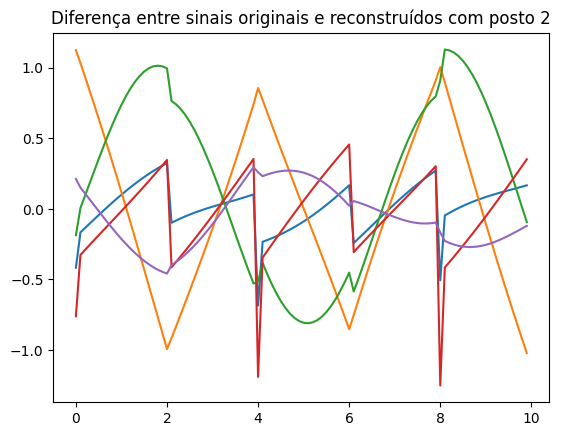

In [185]:
# Calculando erro
plt.plot(sample_points, signals_raw - reconstructed_signals)
plt.title("Diferença entre sinais originais e reconstruídos com posto 2")
plt.show()

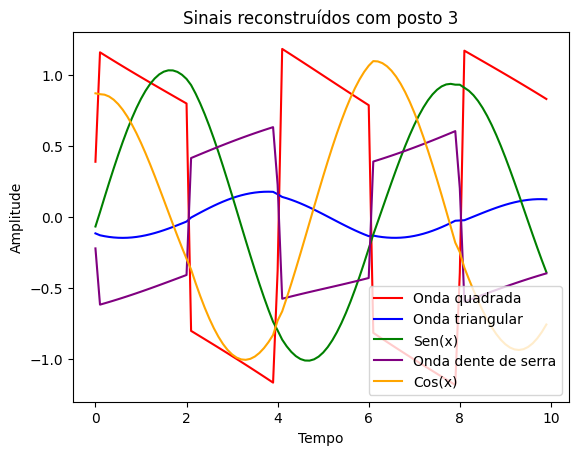

In [186]:
# Plotando sinais reconstruidos com posto 3
reconstructed_signals = svd_reconstruction(U, S, V, 3)

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, reconstructed_signals[:,1], color='blue', label="Onda triangular ")
plt.plot(sample_points, reconstructed_signals[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, reconstructed_signals[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, reconstructed_signals[:,4], color='orange', label="Cos(x)")


plt.title("Sinais reconstruídos com posto 3")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


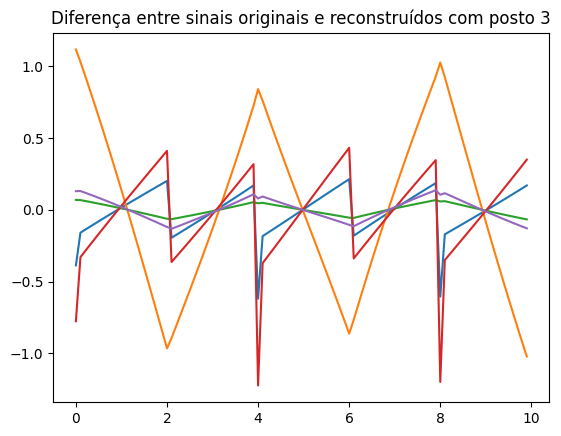

In [187]:
# Calculando erro
plt.plot(sample_points, signals_raw - reconstructed_signals)
plt.title("Diferença entre sinais originais e reconstruídos com posto 3")
plt.show()

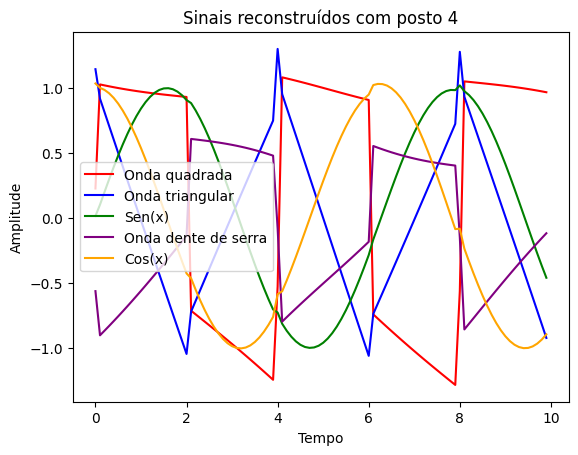

In [188]:
# Plotando sinais reconstruidos com posto 4
reconstructed_signals = svd_reconstruction(U, S, V, 4)

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, reconstructed_signals[:,1], color='blue', label="Onda triangular ")
plt.plot(sample_points, reconstructed_signals[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, reconstructed_signals[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, reconstructed_signals[:,4], color='orange', label="Cos(x)")

plt.title("Sinais reconstruídos com posto 4")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

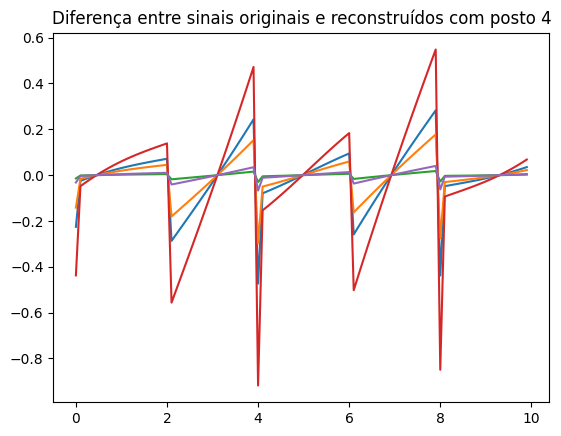

In [189]:
# Calculando erro
plt.plot(sample_points, signals_raw - reconstructed_signals)
plt.title("Diferença entre sinais originais e reconstruídos com posto 4")
plt.show()

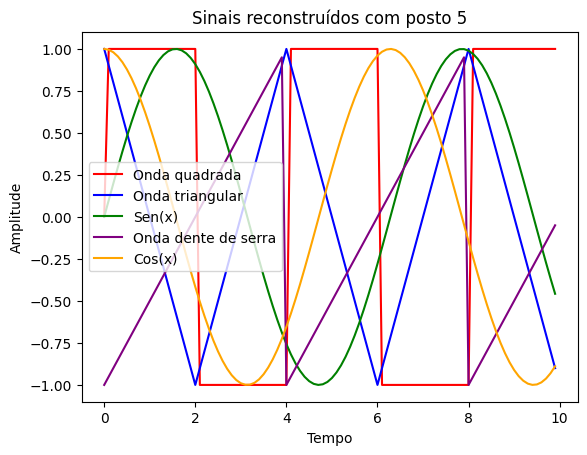

In [190]:
# Plotando sinais reconstruidos com posto 5
reconstructed_signals = svd_reconstruction(U, S, V, 5)

plt.plot(sample_points, reconstructed_signals[:,0], color='red', label="Onda quadrada")
plt.plot(sample_points, reconstructed_signals[:,1], color='blue', label="Onda triangular ")
plt.plot(sample_points, reconstructed_signals[:,2], color='green', label="Sen(x)")
plt.plot(sample_points, reconstructed_signals[:,3], color='purple', label="Onda dente de serra")
plt.plot(sample_points, reconstructed_signals[:,4], color='orange', label="Cos(x)")

plt.title("Sinais reconstruídos com posto 5")
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

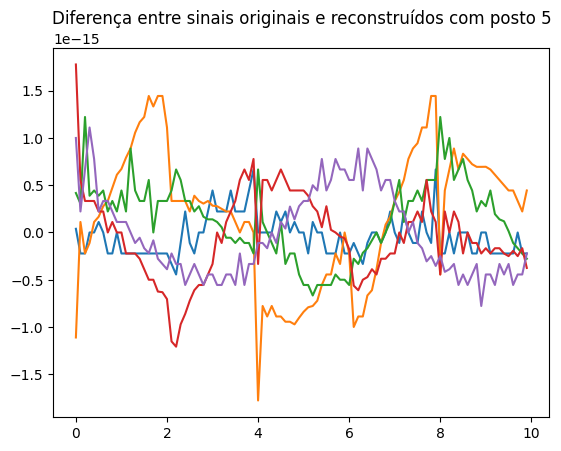

In [191]:
# Calculando erro
plt.plot(sample_points, signals_raw - reconstructed_signals)
plt.title("Diferença entre sinais originais e reconstruídos com posto 5")
plt.show()

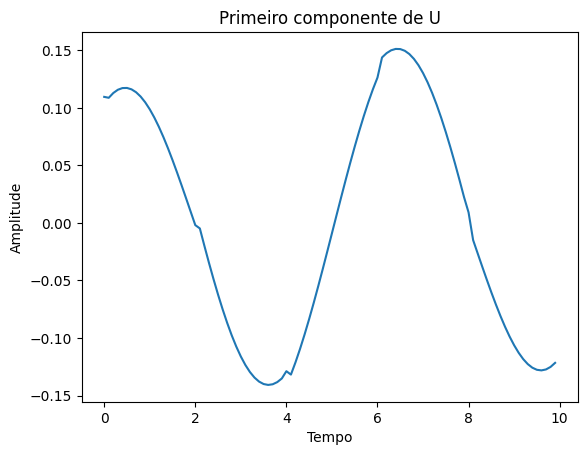

In [192]:
# Primeiro componente de U
plot_signal(sample_points, U[:, 1], "Primeiro componente de U")

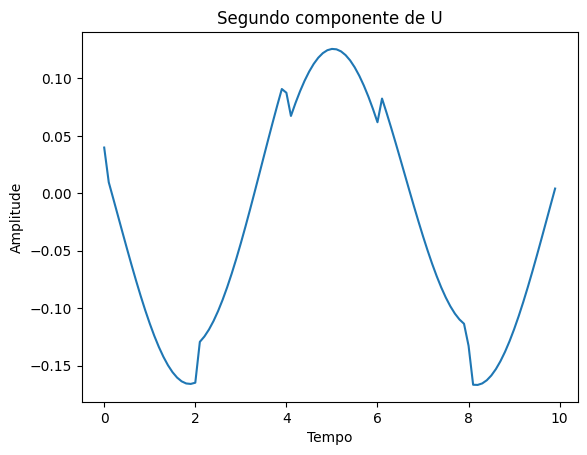

In [193]:
# Segundo componente de U
plot_signal(sample_points, U[:, 2], "Segundo componente de U")

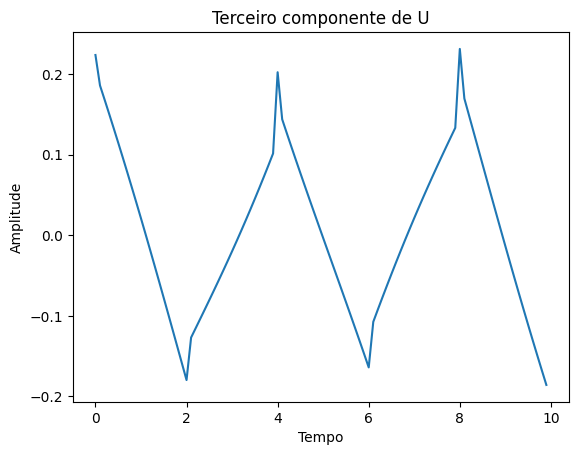

In [194]:
# Terceiro componente de U
plot_signal(sample_points, U[:, 3], "Terceiro componente de U")

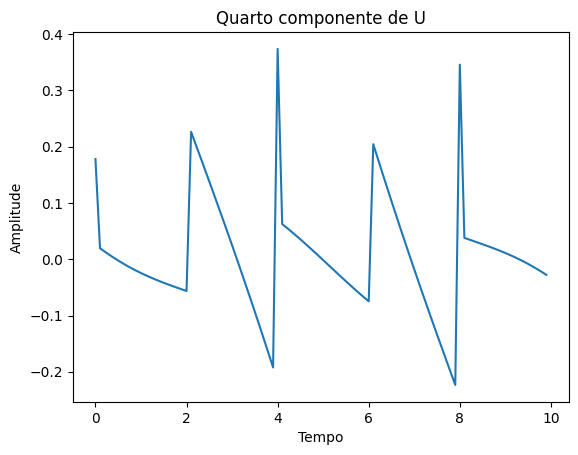

In [195]:
# Quarto componente de U
plot_signal(sample_points, U[:, 4], "Quarto componente de U")

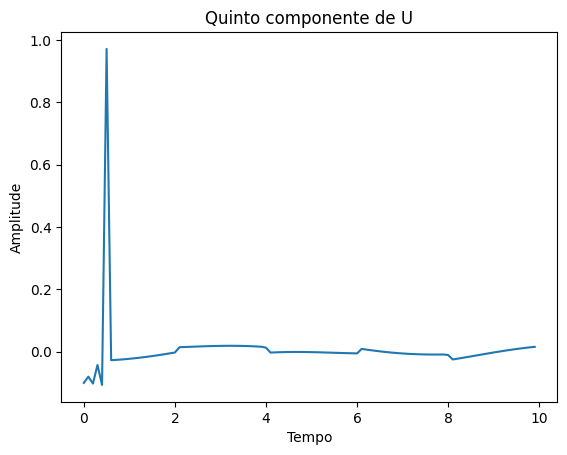

In [196]:
# Quinto componente de U
plot_signal(sample_points, U[:, 5], "Quinto componente de U")